# MAGE calculation for type 2 diabetes study

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import LabData
from LabData.DataLoaders.Loader import Loader

In [3]:
cgmLoader = Loader.get_loader("CGMLoader")

In [4]:
cgm = cgmLoader.get_data()


In [5]:
cgm_df = cgm.df

In [6]:
cgm_df

GlucoseValue  \
RegistrationCode ConnectionID Date                                      
-1               1            2013-01-21 14:20:50+02:00          88.0   
                              2013-01-21 14:25:50+02:00          89.0   
                              2013-01-21 14:30:50+02:00          87.0   
                              2013-01-21 14:35:50+02:00          85.0   
                              2013-01-21 14:40:50+02:00          84.0   
...                                                               ...   
9999             27           2013-02-09 19:37:29+02:00          75.0   
                              2013-02-09 19:42:29+02:00          77.0   
                              2013-02-09 19:47:29+02:00          80.0   
                              2013-02-09 19:52:29+02:00          84.0   
                              2013-02-09 19:57:29+02:00          87.0   

                                                             PPGR  
RegistrationCode ConnectionID Date                                 
-1               1            2013-01-21 14:20:50+02:00  0.000000  
                              2013-01-21 14:25:50+02:00  0.000000  
                              2013-01-21 14:30:50+02:00  0.000000  
                              2013-01-21 14:35:50+02:00  0.000000  
                              2013-01-21 14:40:50+02:00  2.583333  
...                                                           ...  
9999             27           2013-02-09 19:37:29+02:00       NaN  
                              2013-02-09 19:42:29+02:00       NaN  
                              2013-02-09 19:47:29+02:00       NaN  
                              2013-02-09 19:52:29+02:00       NaN  
                              2013-02-09 19:57:29+02:00       NaN  

[7974202 rows x 2 columns]

In [7]:
t2d_conns = {9202:{0:[1551, 1552], 1: [1608, 1609]}, 9640:{1:[1607], 0:[1553]}, 9641:{0:[1554], 1:[1605, 1606]},10344:{0:[2134], 1:[2135]}, 9837:{0:[2136], 1:[2137]}, 9838:{0:[2227, 2228], 1:[2229]}, \
                         11756:{0:[3132], 1:[2997]},11563:{0:[3133], 1:[3001, 3002]}, 11631:{0:[3346], 1:[3241]}, 11861:{0:[3444, 3445], 1:[3303]}, 12109:{0:[3446], 1:[3302]},\
                         11624:{0:[3393], 1:[3510]}, 12026:{0:[3395], 1:[3511]}, 12216:{0:[3394], 1:[3509]}, 12282:{0:[3507], 1:[3508]},12299:{0:[4286], 1:[4042]}, 7811:{0:[4287],\
                        1:[4116]}, 12653: {0:[4452], 1:[4229, 4230]}, 11399:{0: [4449], 1:[4448]}, 12843:{0:[4451], 1:[4450]}, 11446:{0:[4194, 4195], 1:[4453]}, 13043:{0:[4718], 1:[4541]},13449:{0:[4950],1:[5102]}}

In [8]:
CID_list = [1551, 1552, 1608, 1609, 1607, 1553, 1554, 1605, 1606, 2134, 2135, 2136, 2137, 2227, 2228, 2229, 3132, 2997, 3133, 3001, 3002,\
           3346, 3241, 3444, 3445, 3303, 3446, 3302, 3393, 3510, 3395, 3511, 3394, 3509, 3507, 3508, 4286, 4042, 4287, 4116, 4452, 4229, 4230,\
           4449, 4448, 4451, 4450, 4194, 4195, 4453, 4718, 4541, 4950, 5102]

In [9]:
CID_list = [str(i) for i in CID_list]

In [10]:
CID_list.sort()
len(CID_list)

54

In [11]:
cgm_df.reset_index(inplace=True)

In [12]:
cgm_filtered = cgm_df[cgm_df.ConnectionID.isin(CID_list)]

In [13]:
len(set(cgm_filtered.ConnectionID))

49

In [14]:
set(CID_list) - set(cgm_filtered.ConnectionID)

{'1552', '1606', '1609', '4194', '4229'}

In [15]:
cgm_filtered = cgm_filtered.set_index(['RegistrationCode', 'ConnectionID', 'Date'])
cgm_filtered

GlucoseValue    PPGR
RegistrationCode ConnectionID Date                                           
136529           4195         2018-11-19 10:18:00+02:00         179.0   0.000
                              2018-11-19 10:33:00+02:00         180.0   3.000
                              2018-11-19 10:48:00+02:00         183.0   4.125
                              2018-11-19 11:03:00+02:00         181.0  12.250
                              2018-11-19 11:18:00+02:00         176.0  25.375
...                                                               ...     ...
933765           4449         2018-12-18 04:28:00+02:00         115.0     NaN
                              2018-12-18 04:43:00+02:00         114.0     NaN
                              2018-12-18 04:58:00+02:00         111.0     NaN
                              2018-12-18 05:13:00+02:00         105.0     NaN
                              2018-12-18 05:28:00+02:00         104.0     NaN

[49006 rows x 2 columns]

In [16]:
result = cgmLoader.calculate_mage(cgm_filtered)

In [17]:
result

,RegistrationCode,ConnectionID,date,mage,hmage,lmage,ge
0,136529,4195,2018-11-19,22.50,0.00,45.00,1.0
55,136529,4195,2018-11-20,0.00,0.00,0.00,0.0
150,136529,4195,2018-11-21,0.00,0.00,0.00,0.0
242,136529,4195,2018-11-22,0.00,0.00,0.00,0.0
337,136529,4195,2018-11-23,17.50,0.00,35.00,1.0
...,...,...,...,...,...,...,...
677,933765,4449,2018-12-13,33.00,26.00,40.00,3.0
756,933765,4449,2018-12-14,30.16,27.33,33.00,7.0
846,933765,4449,2018-12-15,37.50,37.00,38.00,5.0
941,933765,4449,2018-12-16,30.30,29.00,31.60,6.0


In [18]:
CID_control_list = []
for value in t2d_conns.values():
    for item in value[0]:
        CID_control_list.append(str(item))
CID_main_list = []
for value in t2d_conns.values():
    for item in value[1]:
        CID_main_list.append(str(item))

In [19]:
len(CID_control_list)

27

In [20]:
len(CID_main_list)

27

In [21]:
mean_mage = result.groupby(['RegistrationCode', 'ConnectionID'], as_index=False)['mage'].agg('mean')

In [22]:
mean_mage['alloc'] = 0

In [23]:
mean_mage.loc[mean_mage['ConnectionID'].isin(CID_main_list), 'alloc'] = 1

In [24]:
mean_mage.sort_values(by='RegistrationCode')

,RegistrationCode,ConnectionID,mage,alloc
0,136529,4195,11.937500,0
1,136529,4453,10.480769,1
2,256342,2136,24.159091,0
3,256342,2137,22.059231,1
4,258029,2997,12.705000,1
5,258029,3132,17.065000,0
6,292372,3001,24.398333,1
7,292372,3002,14.790000,1
8,292372,3133,18.615714,0
9,292738,1551,23.718750,0


In [25]:
mean_mage.to_csv('/home/elming/Cache/LabData/T2D_mean_mage.csv')

In [26]:
control = np.array(mean_mage[mean_mage["ConnectionID"].isin(CID_control_list)]['mage'])

In [27]:
main = np.array(mean_mage[mean_mage["ConnectionID"].isin(CID_main_list)]['mage'])

In [28]:
print(control, "\n", main )

[11.9375     24.15909091 17.065      18.61571429 23.71875    24.82214286
 27.17285714 20.98769231 16.35461538 19.42642857 10.58333333 16.51
 17.45076923 10.79714286 16.75       28.15636364 15.21571429 18.45714286
 22.35714286 22.05875    23.08666667 22.41071429 22.85125    24.508
 32.52076923] 
 [10.48076923 22.05923077 12.705      24.39833333 14.79        6.81555556
 18.33076923 27.555      13.28125    13.08       10.70571429 19.07133333
 10.83928571  9.959      23.10833333 15.89090909 23.32071429 17.24357143
 21.35785714 20.13461538 17.19230769 19.99071429 10.60923077 20.71071429]


In [29]:
stats.ttest_ind(control, main)

Ttest_indResult(statistic=2.251101805441937, pvalue=0.029095289951122077)

## Plots for T2D

I want to be able to make a plot for any participant with how mean MAGE varied troughout the connection days. 
Different layouts for multiple plots [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html)

In [30]:
result

,RegistrationCode,ConnectionID,date,mage,hmage,lmage,ge
0,136529,4195,2018-11-19,22.50,0.00,45.00,1.0
55,136529,4195,2018-11-20,0.00,0.00,0.00,0.0
150,136529,4195,2018-11-21,0.00,0.00,0.00,0.0
242,136529,4195,2018-11-22,0.00,0.00,0.00,0.0
337,136529,4195,2018-11-23,17.50,0.00,35.00,1.0
...,...,...,...,...,...,...,...
677,933765,4449,2018-12-13,33.00,26.00,40.00,3.0
756,933765,4449,2018-12-14,30.16,27.33,33.00,7.0
846,933765,4449,2018-12-15,37.50,37.00,38.00,5.0
941,933765,4449,2018-12-16,30.30,29.00,31.60,6.0


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
result['alloc'] = 0
result.loc[result['ConnectionID'].isin(CID_main_list), 'alloc'] = 1

/home/elming/anaconda3/envs/mylabdata/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


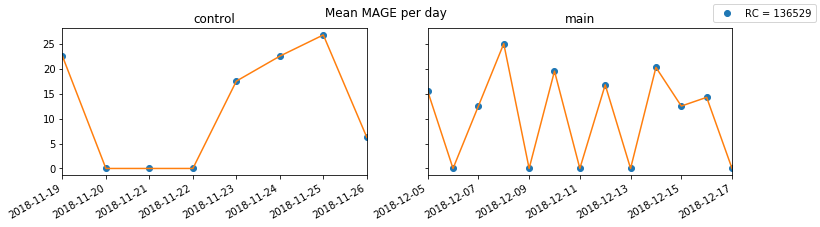

In [33]:
x1 = result[(result['RegistrationCode'] == '136529') & (result['alloc'] == 0)]['date']
y1 = result[(result['RegistrationCode'] == '136529') & (result['alloc'] == 0)]['mage']
x2 = result[(result['RegistrationCode'] == '136529') & (result['alloc'] == 1)]['date']
y2 = result[(result['RegistrationCode'] == '136529') & (result['alloc'] == 1)]['mage']

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,3))
fig.autofmt_xdate() # makes the date appear as a diagonal
fig.suptitle('Mean MAGE per day')

ax[0].plot_date(x1, y1)
ax[0].plot(x1, y1)
ax[0].set_xlim([x1[0:1], x1[-1:]])
ax[0].set_title('control')

ax[1].plot_date(x2, y2)
ax[1].plot(x2, y2)
ax[1].set_xlim([x2[0:1], x2[-1:]])
ax[1].set_title('main')

fig.legend(['RC = 136529'])


In [34]:
def plot_mage_per_day(mage_df, rc):
    x1 = mage_df[(mage_df['RegistrationCode'] == rc) & (mage_df['alloc'] == 0)]['date']
    y1 = mage_df[(mage_df['RegistrationCode'] == rc) & (mage_df['alloc'] == 0)]['mage']
    x2 = mage_df[(mage_df['RegistrationCode'] == rc) & (mage_df['alloc'] == 1)]['date']
    y2 = mage_df[(mage_df['RegistrationCode'] == rc) & (mage_df['alloc'] == 1)]['mage']

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,3))
    fig.autofmt_xdate() # makes the date appear as a diagonal
    fig.suptitle('Mean MAGE per day')

    ax[0].plot_date(x1, y1)
    ax[0].plot(x1, y1)
    
    ax[0].set_xlim([x1[0:1], x1[-1:]])
    ax[0].set_title('control')

    ax[1].plot_date(x2, y2)
    ax[1].plot(x2, y2)
    ax[1].set_xlim([x2[0:1], x2[-1:]])
    ax[1].set_title('main')
    
    fig.legend(['RC = {}'.format(int(rc))])

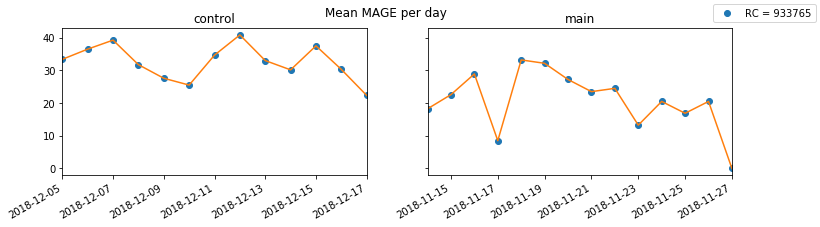

In [35]:
plot_mage_per_day(result, '933765')

/home/elming/anaconda3/envs/mylabdata/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


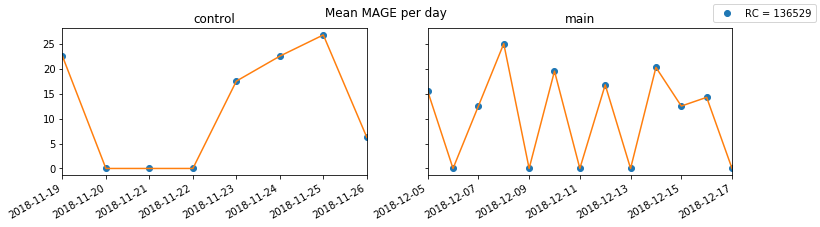

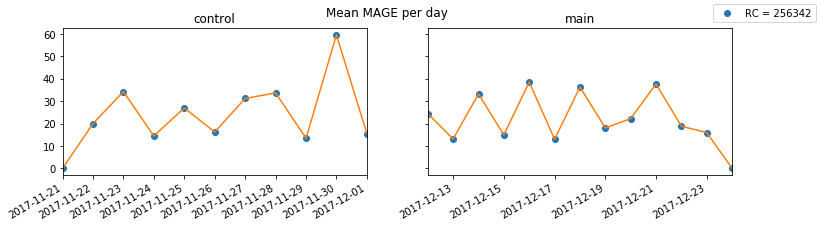

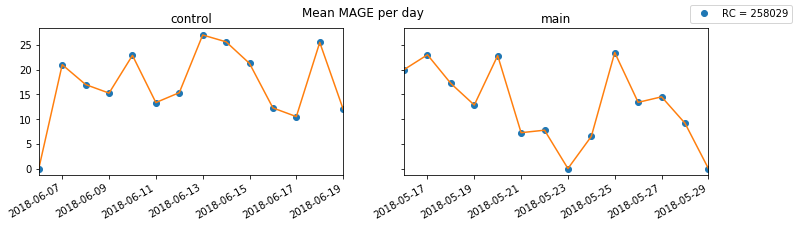

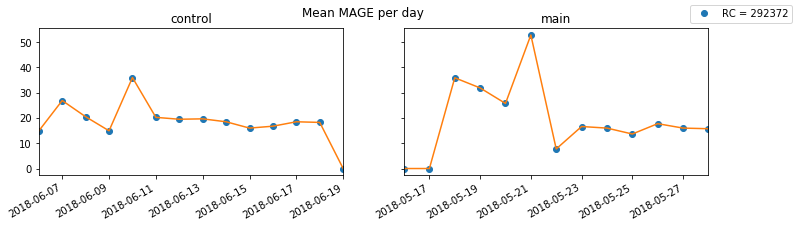

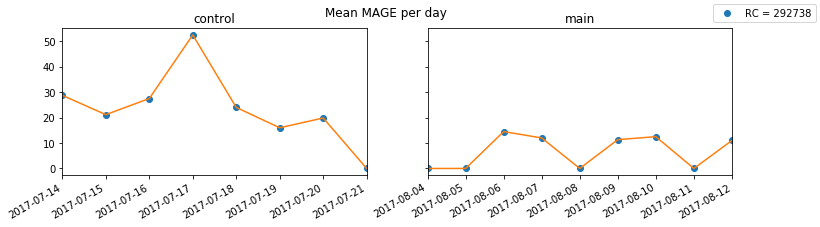

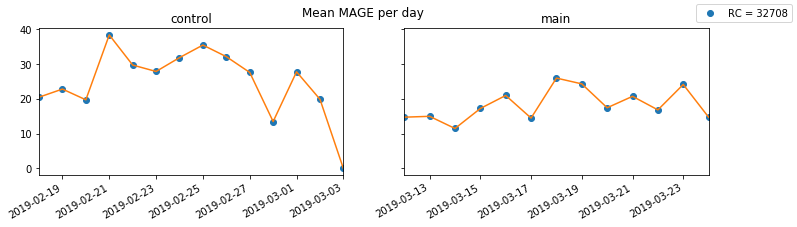

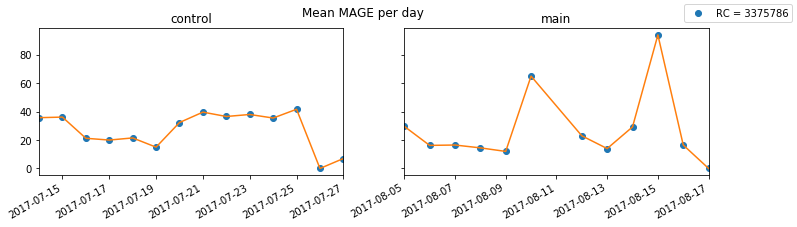

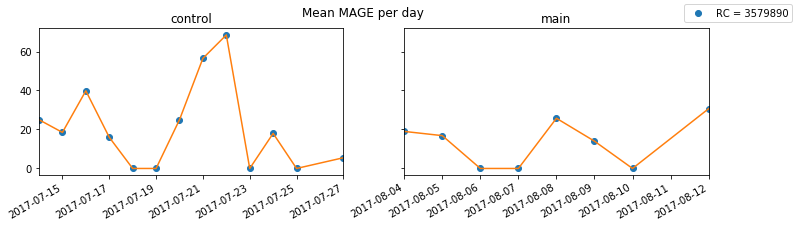

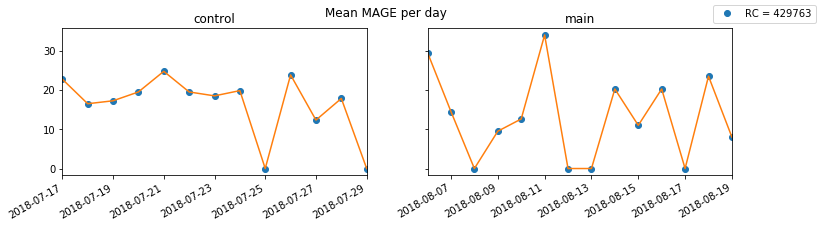

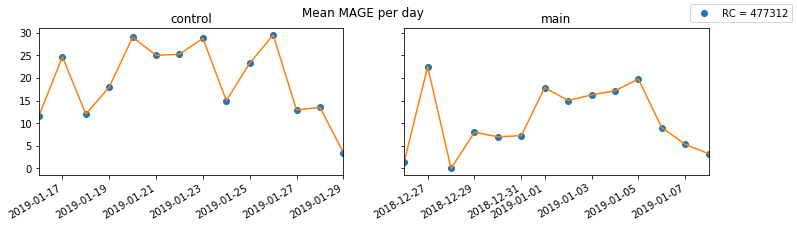

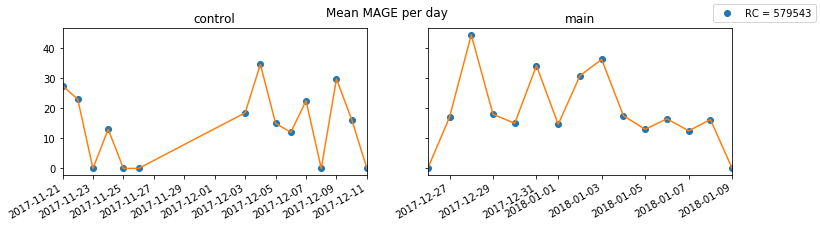

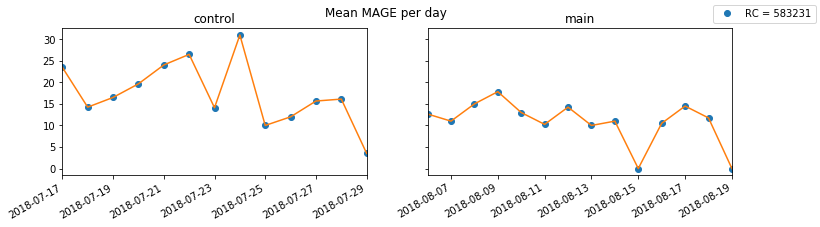

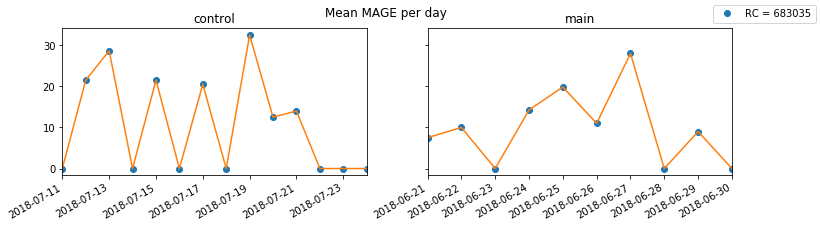

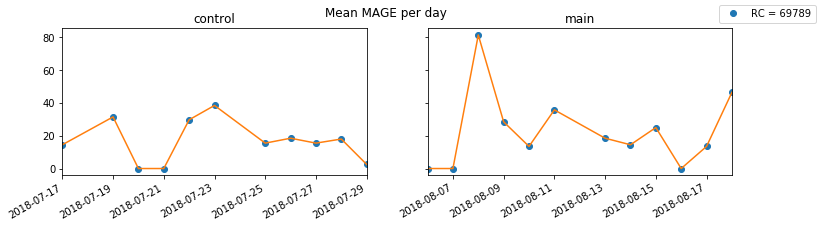

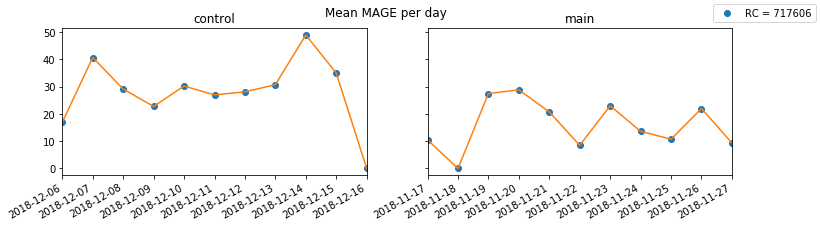

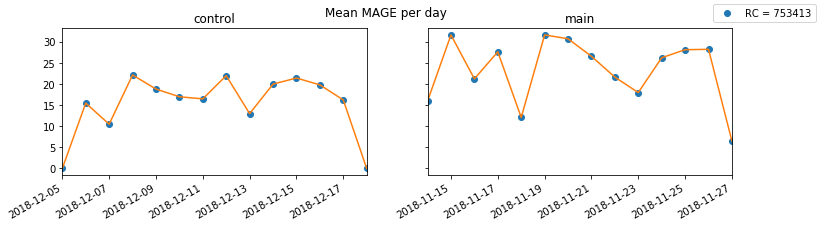

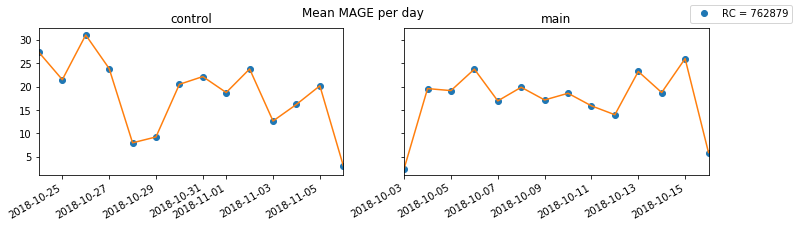

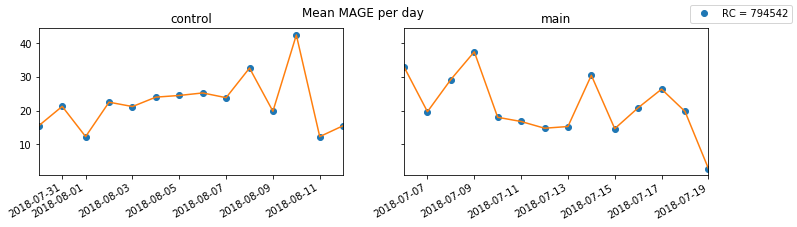

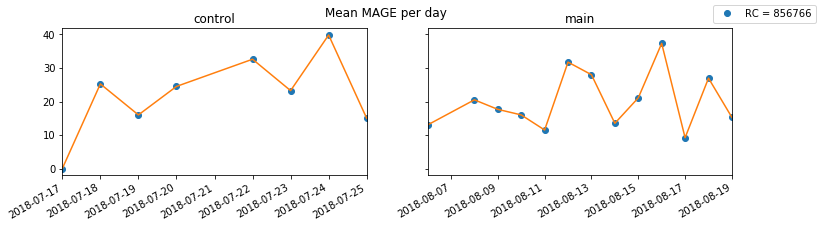

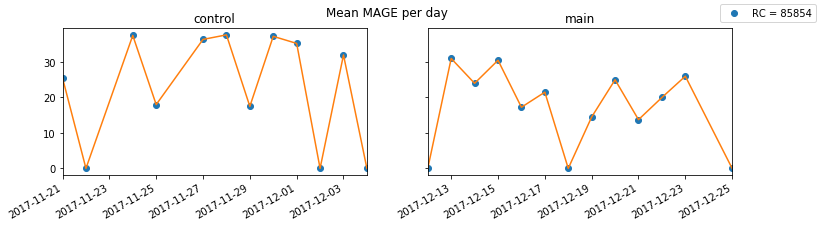

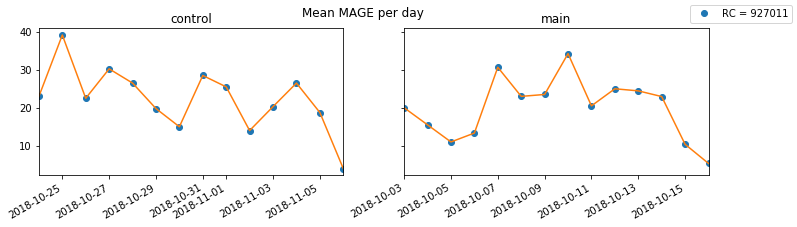

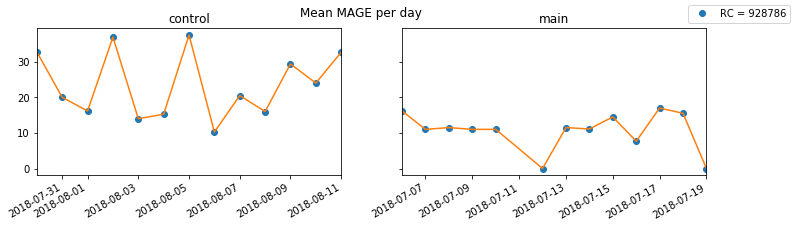

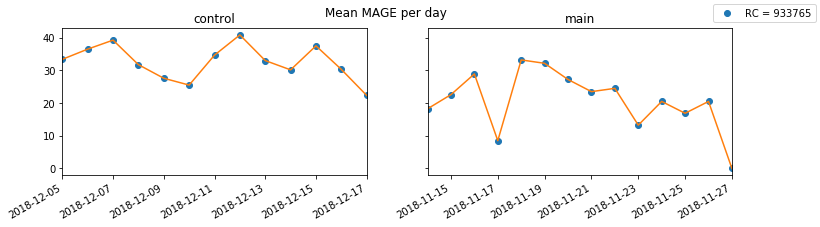

In [101]:
for rc in result.RegistrationCode.unique():
    plot_mage_per_day(result, rc)

From the graphs above we see that the MAGE values on the main arm tend to be lower on average. However we see that on some days MAGE values are really high, whereas on the other days they can be 0. I would like to be able to visualize the cgm for a specific day for a certain study participant and in the future would be also cool to see the food log, exercise info, sleeping data together with the cgm. This information is already present in the reports.